# DATA LOADING AND EXPLORATION

In [1]:
# import the necessary packages for the first part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../Data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The next thing was to describe the numerical columns so we could get a feel of what the columns looked liked and their distributions across board.

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


The distributions of the data are not exactly consistent across all the parameters so when we move into feature engineering before using the features for training the model, we would have to normalize the values of the x.

We would have to drop out the 'id' and 'Unnamed: 32' columns since we would not be using it as features.

In [4]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# check columns with missing values
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Plot histogrmas of the remaining columns after dropping the first ones

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

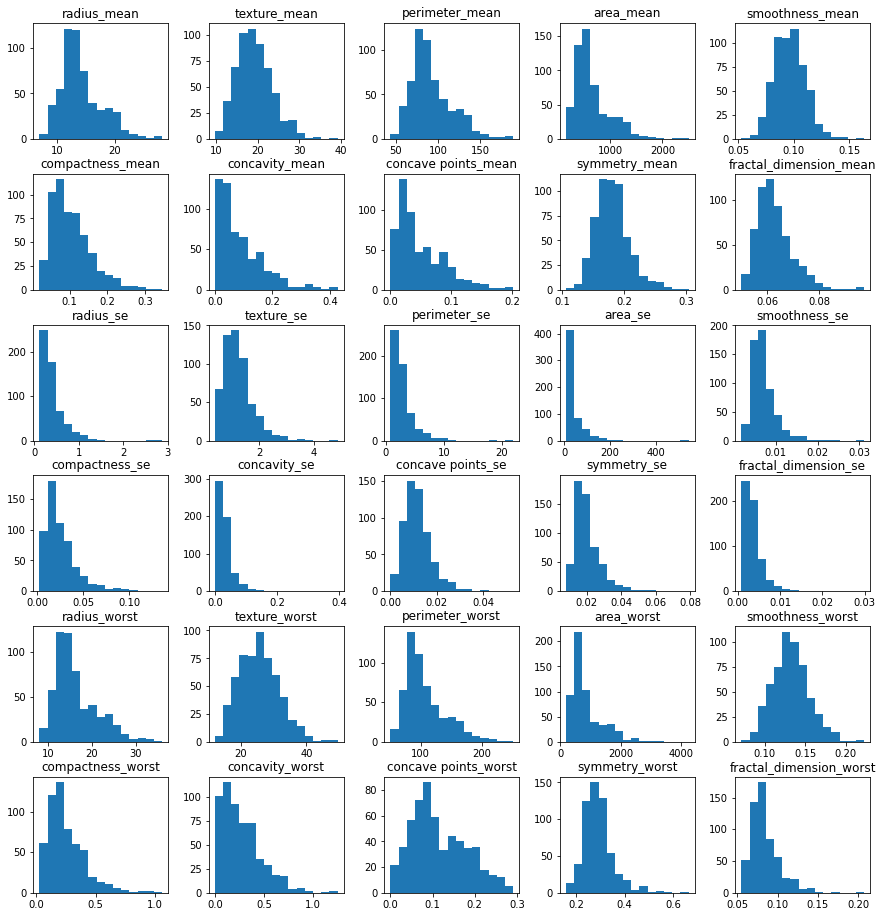

In [6]:
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'
df.hist(bins=15, figsize=(15, 16),grid=False)

The plots above show the breakdown of the distribution of the variables across the dataset with the first 2 rows for the `_mean` varibles, the second 2 rows for `_se` and the last 2 rows for the `_worst` variables. I did understand the `_mean` and the `_se` were for means and standard errors of those parameters but I didnt know what the `_worst` in that case meant. I did not need the breakdown of this information to make the models at this point though. There were some parameters that showed deviations from an ideal normal distribution so some scaling or normalization would be needed to be performed on the datasets. This was going into the data engineering steps.

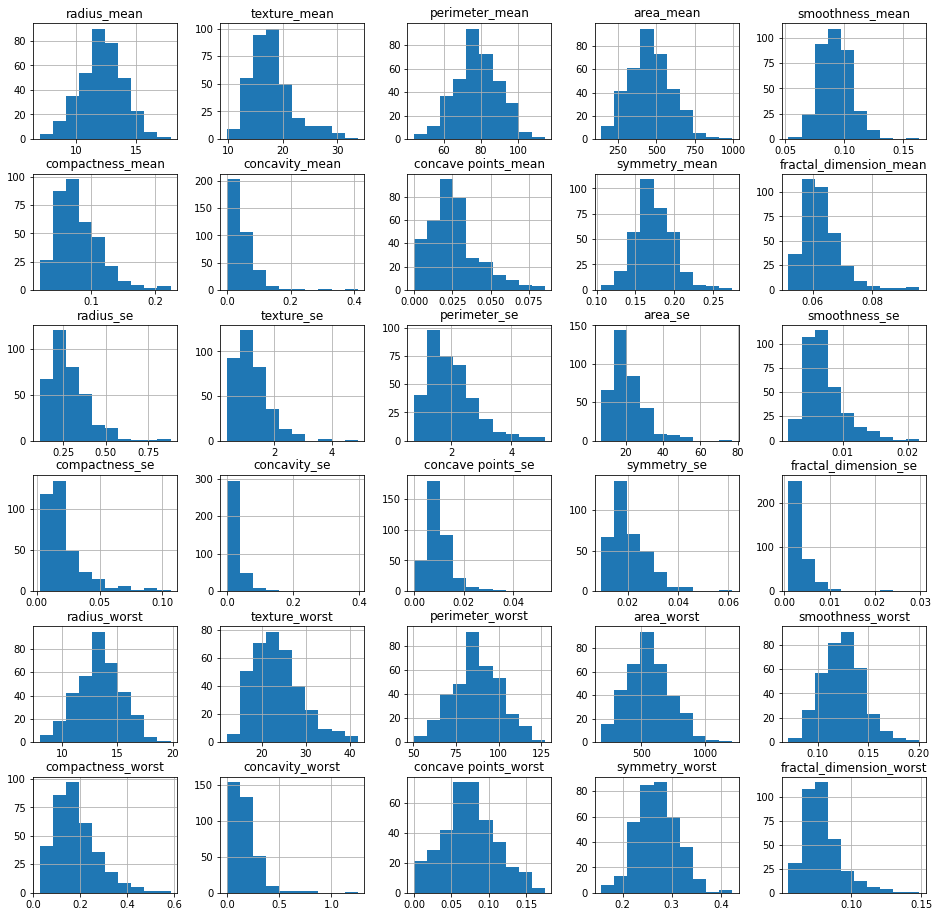

In [7]:
# diagnosis being benign
df[df['diagnosis'] == 'B'].hist(figsize=(16,16))
plt.show()

The image above shows the distribution of the vaiables in the dataset only for when the target variable was benign.

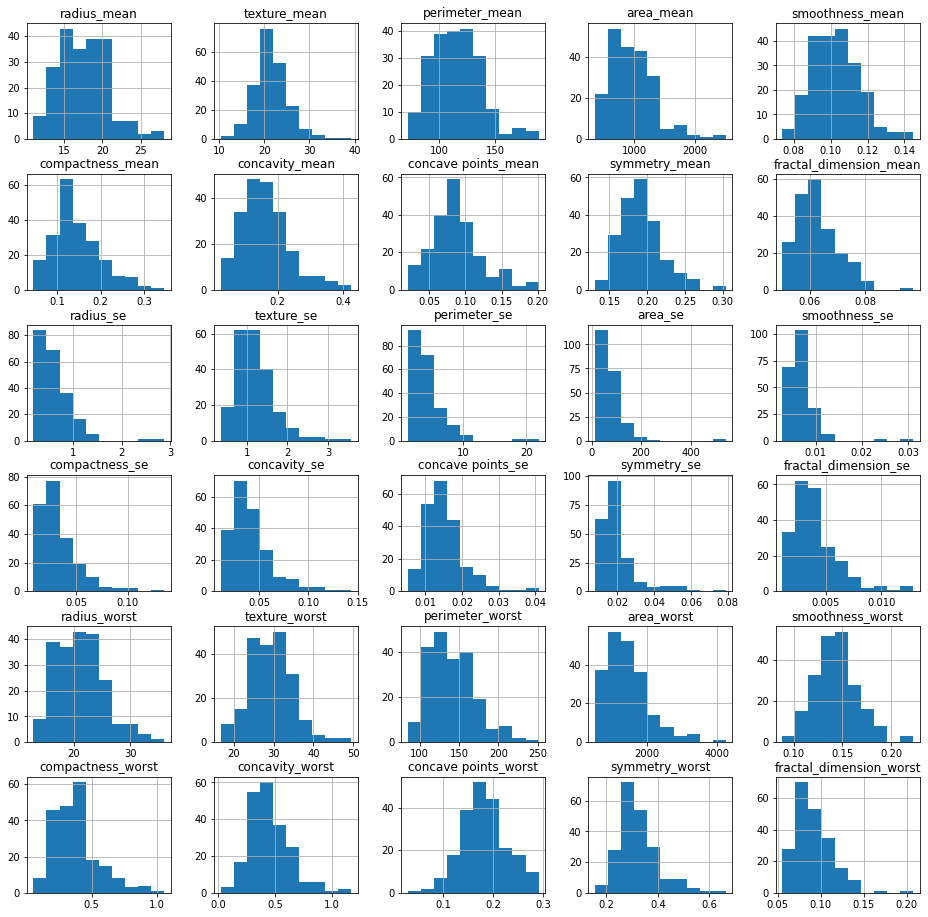

In [8]:
# diagnosis being malignant
df[df['diagnosis'] == 'M'].hist(figsize=(16,16))
plt.show()

The image above shows the distribution of the vaiables in the dataset only for when the target variable was malignant.

We then decide to explore the target varaible going into the data cleaning and feature engineering to determine if some work must be done on it.

In [9]:
# The breakdown of the target variable.
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

There seems to be some imbalance in the target values counts. This would likely cause a slight imbalance in the results. Going forward, we would decide whether we would want to deal with this or go ahead if the results are not being affected. For further illustration, the diagram of this information is shown below.

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

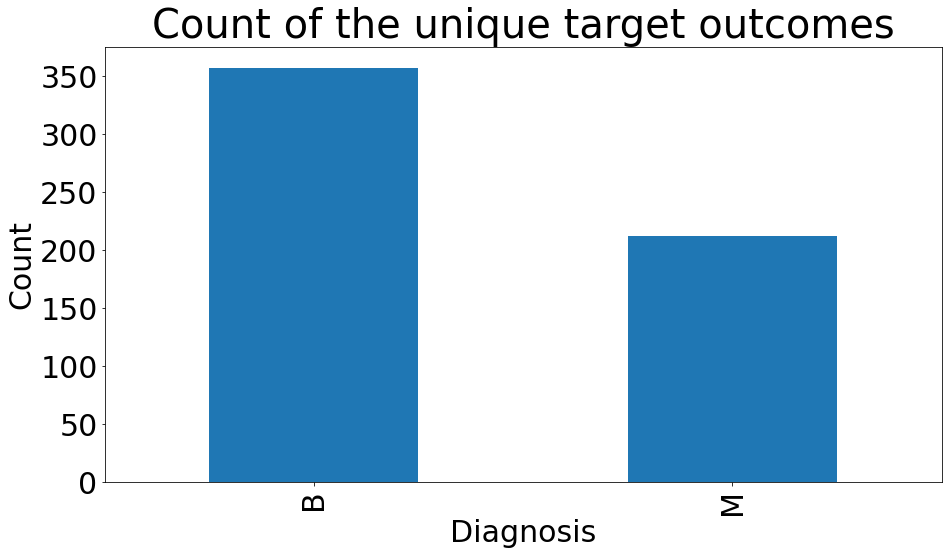

In [10]:
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Count of the unique target outcomes', fontdict={'fontsize':40})
plt.xlabel('Diagnosis', fontdict={'fontsize':30})
plt.ylabel('Count', fontdict={'fontsize':30})
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

# DATA CLEANING AND FEATURE ENGINEERING

In [11]:
# import the packages for the preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
# create arrays for the x and y values
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

# transform the 'Diagnosis' data into an encoder
le = LabelEncoder()
y = le.fit_transform(y)

# next step is to split the data into training and testing data for model evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Normalizing the features of the variables for importance consistency
scaler = StandardScaler()
scX = scaler.fit(X_train)
X_train = scX.transform(X_train)
X_test = scX.transform(X_test)

(455, 30)
(114, 30)
(455,)
(114,)


# MODEL DEPLOYMENT

Here we are going to be using different optimized machine learning models to train and test the data and ensure that we are obtaining the highest classification accuracies as possible.

In [13]:
# sd asf aimport the machine learning models for the classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

Training my models with a KFold cross validation with 10 splits

### Logistic Regression

In [14]:
# Logistic Regression
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring='accuracy')
LRmodel = cv_results.mean()
print('The training accuracy of the Logistic Regression model is {:.5f}'.format(LRmodel))

The training accuracy of the Logistic Regression model is 0.97802


### SVM Classifier

In [15]:
# SVM Classifer
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(SVC(), X_train, y_train, cv=kfold, scoring='accuracy')
SVMmodel = cv_results.mean()
print('The training accuracy of the SVC model is {:.5f}'.format(SVMmodel))

The training accuracy of the SVC model is 0.97792


### Decision Tree

In [16]:
# Decision Tree Classifier
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=kfold, scoring='accuracy')
DecisionTmodel = cv_results.mean()
print('The training accuracy of the Decision Tree Classifier is {:.5f}'.format(DecisionTmodel))

The training accuracy of the Decision Tree Classifier is 0.93628


### Random Forest

In [17]:
# Random Forest Classifier
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=kfold, scoring='accuracy')
RandomFmodel = cv_results.mean()
print('The training accuracy of the Random Forest Classifier is {:.5f}'.format(RandomFmodel))

The training accuracy of the Random Forest Classifier is 0.95159


### Multi-Layer Feedforward neural net

In [18]:
# Multi-layer feedforward neural network model
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(30,), name='Input Layer'))
model.add(tf.keras.layers.Dense(15, activation='relu', name='Hidden-Layer'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer'))

# compile the keras model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='Accuracy')
model.summary()

# fit the built model
ML = model.fit(X_train, y_train, batch_size=10, epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer (Dense)        (None, 15)                465       
                                                                 
 Output-Layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
46/46 [==============================] - 1s 2ms/step - loss: 0.5406 - Accuracy: 0.6571
Epoch 2/20
46/46 [==============================] - 0s 2ms/step - loss: 0.3189 - Accuracy: 0.9033
Epoch 3/20
46/46 [==============================] - 0s 2ms/step - loss: 0.2072 - Accuracy: 0.9385
Epoch 4/20
46/46 [==============================] - 0s 2ms/step - loss: 0.1547 - Accuracy: 0.9516
Epoch 5/20
46/46 [==============================] - 0s 2ms/ste

In [19]:
MLmodel = (ML.history['Accuracy'])[-1]

In [20]:
training_accuracy = pd.DataFrame({
    "Training Accuracy": [LRmodel, DecisionTmodel, RandomFmodel, SVMmodel, MLmodel]
}, index = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "MultiLayer"]
)
training_accuracy

,Training Accuracy
Logistic Regression,0.978019
Decision Tree,0.936280
Random Forest,0.951594
SVM,0.977923
MultiLayer,0.991209


In [21]:
round(5.25699, 3)

5.257

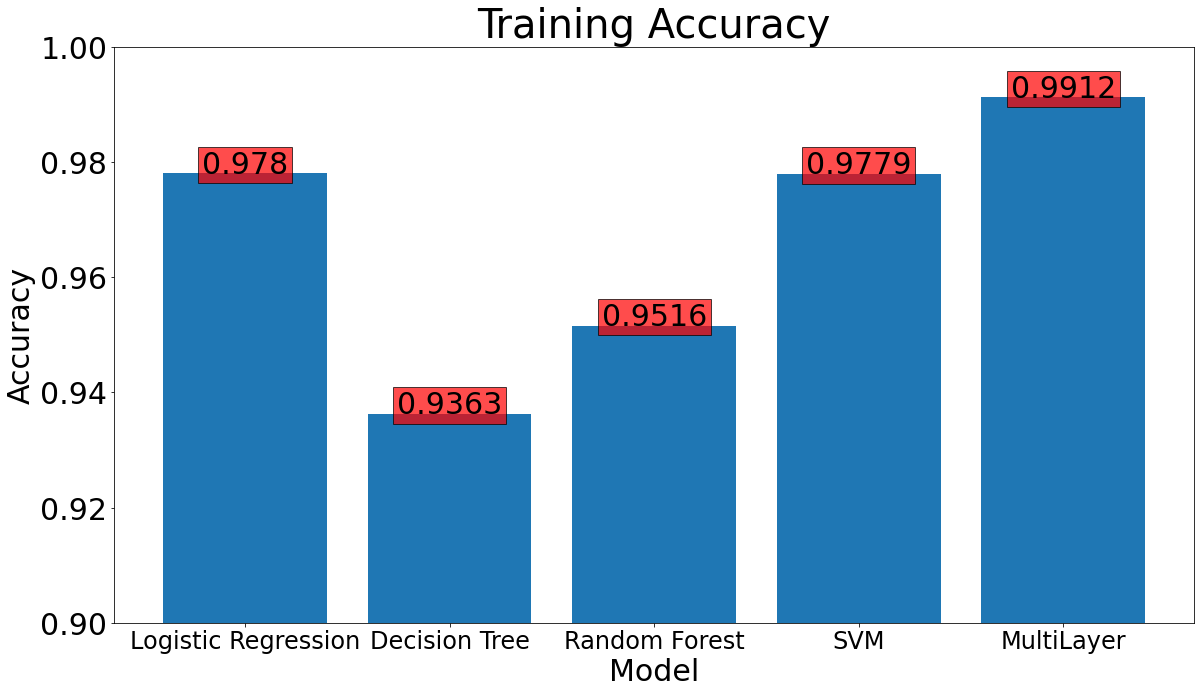

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "MultiLayer"]
accur = [LRmodel, DecisionTmodel, RandomFmodel, SVMmodel, MLmodel]
ax.bar(models, accur)
plt.ylim(0.9,1)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 30)
plt.title('Training Accuracy', fontdict={'fontsize': 40})
plt.xlabel('Model', fontdict={'fontsize': 30})
plt.ylabel('Accuracy', fontdict={'fontsize': 30})
for i in range(len(models)):
        plt.text(i, round(accur[i], 4), round(accur[i], 4), ha = 'center', bbox = dict(facecolor = 'red', alpha =.7), fontdict={'fontsize': 30})
plt.show()

# MODEL EVALUATION

### Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.95      0.98      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



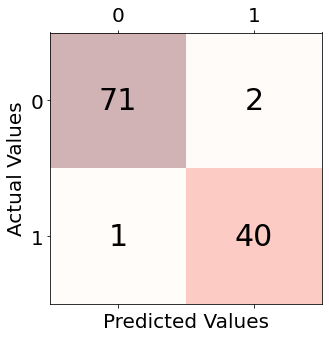

In [23]:
# Logistic Regression Classifier
y_predLR = LogisticRegression().fit(X_train, y_train).predict(X_test)
LRvalacc = accuracy_score(y_predLR, y_test)
LRcm = cm(y_predLR, y_test)
LRcr = classification_report(y_predLR, y_test)
print(LRcr)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(LRcm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(LRcm.shape[0]):
     for j in range(LRcm.shape[1]):
         ax.text(x=j, y=i,
                s=LRcm[i, j], 
                va='center', ha='center', fontdict={'fontsize': 30})
plt.xlabel('Predicted Values', fontdict={'fontsize': 20})
plt.ylabel('Actual Values', fontdict={'fontsize': 20})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.90      0.95      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



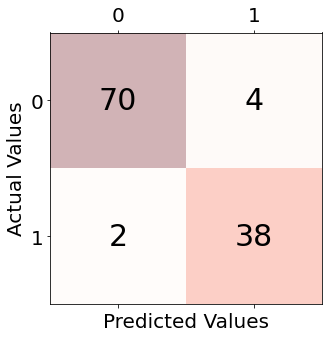

In [24]:
# Decision Tree Classifier
y_predDT = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
DTvalacc = accuracy_score(y_predDT, y_test)
DTcm = cm(y_predDT, y_test)
DTcr = classification_report(y_predDT, y_test)
print(DTcr)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(DTcm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(DTcm.shape[0]):
     for j in range(DTcm.shape[1]):
         ax.text(x=j, y=i,
                s=DTcm[i, j], 
                va='center', ha='center', fontdict={'fontsize': 30})
plt.xlabel('Predicted Values', fontdict={'fontsize': 20})
plt.ylabel('Actual Values', fontdict={'fontsize': 20})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### Random Forest

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        77
           1       0.88      1.00      0.94        37

    accuracy                           0.96       114
   macro avg       0.94      0.97      0.95       114
weighted avg       0.96      0.96      0.96       114



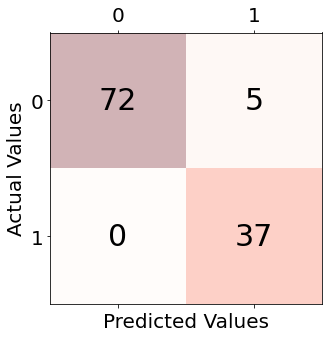

In [25]:
# Random Forest Classifier
y_predRF = RandomForestClassifier().fit(X_train, y_train).predict(X_test)
RFvalacc = accuracy_score(y_predRF, y_test)
RFcm = cm(y_predRF, y_test)
RFcr = classification_report(y_predRF, y_test)
print(RFcr)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(RFcm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(RFcm.shape[0]):
     for j in range(RFcm.shape[1]):
         ax.text(x=j, y=i,
                s=RFcm[i, j], 
                va='center', ha='center', fontdict={'fontsize': 30})
plt.xlabel('Predicted Values', fontdict={'fontsize': 20})
plt.ylabel('Actual Values', fontdict={'fontsize': 20})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### SVM Classifier

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.95      0.98      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



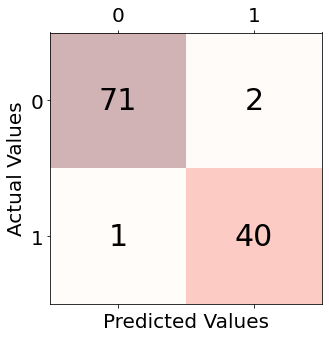

In [26]:
# SVM Classifier
y_predSVM = SVC().fit(X_train, y_train).predict(X_test)
SVMvalacc = accuracy_score(y_predSVM, y_test)
SVMcm = cm(y_predSVM, y_test)
SVMcr = classification_report(y_predSVM, y_test)
print(SVMcr)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(SVMcm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(SVMcm.shape[0]):
     for j in range(SVMcm.shape[1]):
         ax.text(x=j, y=i,
                s=SVMcm[i, j], 
                va='center', ha='center', fontdict={'fontsize': 30})
plt.xlabel('Predicted Values', fontdict={'fontsize': 20})
plt.ylabel('Actual Values', fontdict={'fontsize': 20})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### Multi-Layer Feedforward neural net

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



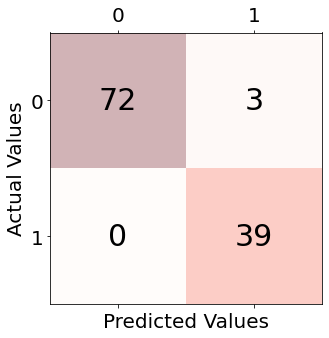

In [27]:
#y_preds = np.argmax(predicted, axis=1)
y_predNN = (model.predict(X_test) > 0.5).astype("int32")

# MLFNN Classifier
NNvalacc = accuracy_score(y_predNN, y_test)
NNcm = cm(y_predNN, y_test)
NNcr = classification_report(y_predNN, y_test)
print(NNcr)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(NNcm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(NNcm.shape[0]):
     for j in range(NNcm.shape[1]):
         ax.text(x=j, y=i,
                s=NNcm[i, j], 
                va='center', ha='center', fontdict={'fontsize': 30})
plt.xlabel('Predicted Values', fontdict={'fontsize': 20})
plt.ylabel('Actual Values', fontdict={'fontsize': 20})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [28]:
validation_accuracy = pd.DataFrame({
    "Validation Accuracy": [LRvalacc, DTvalacc, RFvalacc, SVMvalacc, model.evaluate(X_test, y_test)[1]]
}, index = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "MultiLayer"]
)
validation_accuracy

4/4 [==============================] - 0s 2ms/step - loss: 0.0839 - Accuracy: 0.9737


,Validation Accuracy
Logistic Regression,0.973684
Decision Tree,0.947368
Random Forest,0.956140
SVM,0.973684
MultiLayer,0.973684


4/4 [==============================] - 0s 2ms/step - loss: 0.0839 - Accuracy: 0.9737


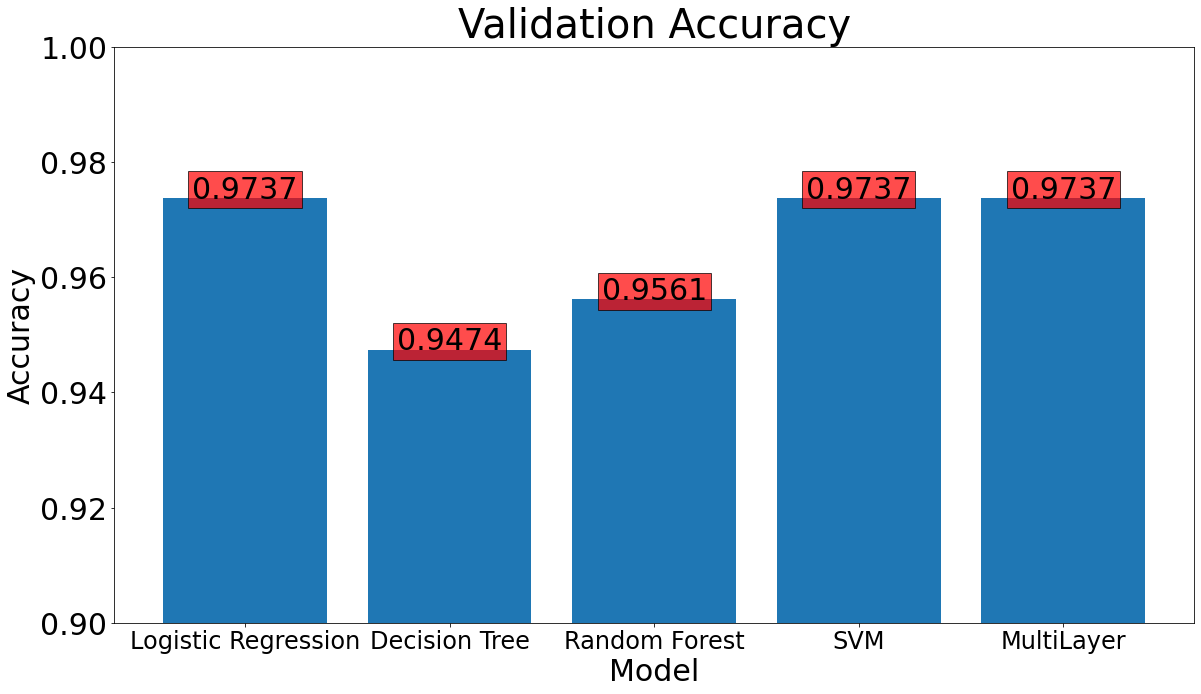

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "MultiLayer"]
accur = [LRvalacc, DTvalacc, RFvalacc, SVMvalacc, model.evaluate(X_test, y_test)[1]]
ax.bar(models, accur)
plt.ylim(0.9,1)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 30)
plt.title('Validation Accuracy', fontdict={'fontsize': 40})
plt.xlabel('Model', fontdict={'fontsize': 30})
plt.ylabel('Accuracy', fontdict={'fontsize': 30})
for i in range(len(models)):
        plt.text(i, round(accur[i], 4), round(accur[i], 4), ha = 'center', bbox = dict(facecolor = 'red', alpha =.7), fontdict={'fontsize': 30})
plt.show()